In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

from sklearn.model_selection import RepeatedKFold

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import category_encoders as ce
from category_encoders import WOEEncoder

In [50]:
df = pd.read_csv('cars_model.csv')

In [51]:
df.head()

,Unnamed: 0,Mileage,Rating,Rating-Count,Year,Price,Name,Status,model_details
0,1,35115,4.5,23,2018,28592.0,Ford,Good,18 Ford Edge SEL
1,3,19097,5.0,359,2020,39958.0,Acura,Good,Acura TLX V6 Advance
2,4,64426,4.4,313,2016,31586.0,Volkswagen,Great,16 Volkswagen Touareg TDI Lux
3,5,1754,4.6,1243,2022,35000.0,Toyota,Great,Toyota Corolla Cross LE
4,6,13044,4.5,363,2019,45495.0,BMW,Good,19 BMW 540 i


In [52]:
df.shape

(8929, 9)

In [53]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [54]:
df.head()

,Mileage,Rating,Rating-Count,Year,Price,Name,Status,model_details
0,35115,4.5,23,2018,28592.0,Ford,Good,18 Ford Edge SEL
1,19097,5.0,359,2020,39958.0,Acura,Good,Acura TLX V6 Advance
2,64426,4.4,313,2016,31586.0,Volkswagen,Great,16 Volkswagen Touareg TDI Lux
3,1754,4.6,1243,2022,35000.0,Toyota,Great,Toyota Corolla Cross LE
4,13044,4.5,363,2019,45495.0,BMW,Good,19 BMW 540 i


## Modelling

In [55]:
numerical = ['Mileage','Rating','Rating-Count','Year','Price']
categorical = ['Name','Status','model_details']

### Define the target variables and the predictors 

In [56]:
X = df.drop(columns=['Price'])
y= df['Price']

## Doing Train-Test-Split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [58]:
X_train.shape

(6250, 7)

In [59]:
y_train.shape

(6250,)

In [60]:
X_test.shape

(2679, 7)

In [61]:
y_test.shape

(2679,)

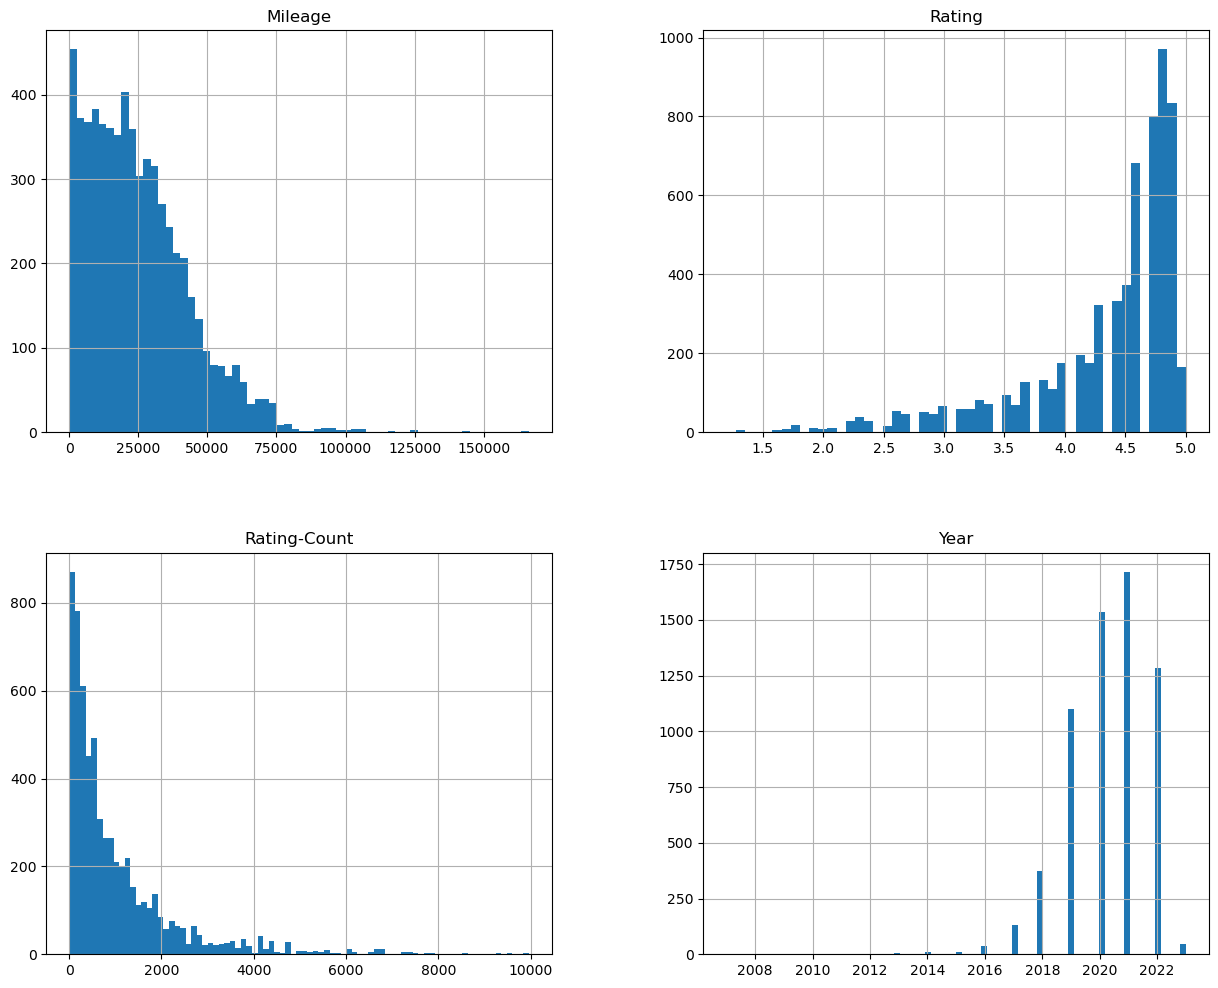

In [62]:
# check distribution of features
X_train.hist(figsize = [15,12], bins = 'auto')
plt.show()

### Defining the seperate pipelines for numeric and categorical features

In [63]:
numeric_pipeline = Pipeline([#('numimputer', SimpleImputer(strategy = 'mean')), 
                             ('numnorm', StandardScaler())])
categorical_pipeline = Pipeline([#('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown = 'ignore')),
    ('onehotnorm', MaxAbsScaler())])

In [64]:
num_cols = X_train.select_dtypes(['int', 'float']).columns
cat_cols = X_train.select_dtypes(['object']).columns

In [65]:
ct = ColumnTransformer(
    [("categorical_pipeline", categorical_pipeline, cat_cols),
     ("numeric_pipeline", numeric_pipeline, num_cols)])

In [66]:
ct

ColumnTransformer(transformers=[('categorical_pipeline',
                                 Pipeline(steps=[('onehotenc',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('onehotnorm',
                                                  MaxAbsScaler())]),
                                 Index(['Name', 'Status', 'model_details'], dtype='object')),
                                ('numeric_pipeline',
                                 Pipeline(steps=[('numnorm',
                                                  StandardScaler())]),
                                 Index(['Mileage', 'Rating', 'Rating-Count', 'Year'], dtype='object'))])

### Viewing the transformed data

In [67]:
md_xtrain = pd.DataFrame(ct.fit_transform(X_train))

In [68]:
md_xtrain

,0,1,2,3,4,5,6,7,8,9,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.081324,-0.520467,-0.680191,-0.922249
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.069473,0.690033,-0.219074,-0.210110
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.589037,0.538721,-0.563132,0.502030
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.387727,0.387408,0.118657,1.214169
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.429391,0.841346,1.553420,-0.210110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.032404,-0.671779,-0.550477,0.502030
6246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.311685,0.841346,0.921460,1.214169
6247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.472202,-2.790154,-0.747421,-0.210110
6248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.287413,0.236096,0.221479,-0.210110


###  Lasso regression

### Lasso Pipeline

In [69]:
Lasso_pipeline = Pipeline([('preprocess', ct),
                      ('model',
                       Lasso())])

In [70]:
Lasso_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['Name', 'Status', 'model_details'], dtype='object')),
                                                 ('numeric_pipeline',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['Mileage', 'Rating', 'Rating-Count', 'Yea

### Fit the model pipeline

In [71]:
Lasso_pipeline.fit(X_train, y_train)

/Users/karankurdia/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4680675915.271118, tolerance: 1222407873.4962518
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['Name', 'Status', 'model_details'], dtype='object')),
                                                 ('numeric_pipeline',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['Mileage', 'Rating', 'Rating-Count', 'Yea

In [72]:
y_pred = linear_pipeline.predict(X_test)

In [73]:
Lasso_pipeline.score(X_test,y_test)

0.8787475831024945

In [74]:
Lasso_pipeline.score(X_train,y_train)

0.9896203270574361

In [75]:
R2 = r2_score(y_test,y_pred)

In [76]:
R2

-1.8224725599580012e+21

In [77]:
RMSE = mean_squared_error(y_test, y_pred, squared = False)

In [78]:
RMSE 

1411968883651590.0

In [83]:
MSE = mean_squared_error(y_test, y_pred)

In [84]:
MSE

1.993656128400317e+30

In [81]:
MAE = mean_absolute_error(y_test, y_pred)

In [82]:
MAE

277903788049947.22

In [85]:
R2 = r2_score(y_test,y_pred)

In [86]:
R2

-1.8224725599580012e+21

## Hyperparameter tuning

In [87]:
Lasso_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocess', 'model', 'preprocess__n_jobs', 'preprocess__remainder', 'preprocess__sparse_threshold', 'preprocess__transformer_weights', 'preprocess__transformers', 'preprocess__verbose', 'preprocess__categorical_pipeline', 'preprocess__numeric_pipeline', 'preprocess__categorical_pipeline__memory', 'preprocess__categorical_pipeline__steps', 'preprocess__categorical_pipeline__verbose', 'preprocess__categorical_pipeline__onehotenc', 'preprocess__categorical_pipeline__onehotnorm', 'preprocess__categorical_pipeline__onehotenc__categories', 'preprocess__categorical_pipeline__onehotenc__drop', 'preprocess__categorical_pipeline__onehotenc__dtype', 'preprocess__categorical_pipeline__onehotenc__handle_unknown', 'preprocess__categorical_pipeline__onehotenc__sparse', 'preprocess__categorical_pipeline__onehotnorm__copy', 'preprocess__numeric_pipeline__memory', 'preprocess__numeric_pipeline__steps', 'preprocess__numeric_pipeline__verbose', 'preprocess__numer

In [92]:
space = dict()
space['model__solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['model__alpha'] = [0, 1, 0.01]
space['model__fit_intercept'] = [True, False]
space['model__normalize'] = [True, False]


In [97]:

# grid search hyperparameters for lasso regression
from numpy import arange

In [101]:
grid = dict()
grid['model__alpha'] = arange(0, 1, 0.01)

In [102]:
clf = GridSearchCV(Lasso_pipeline,grid, scoring='r2', n_jobs=-1, cv=5)

In [103]:
result = clf.fit(X_train, y_train)

/Users/karankurdia/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/karankurdia/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28468509104.766617, tolerance: 1222407873.4962518
  model = cd_fast.enet_coordinate_descent(


In [104]:
result.best_score_

0.8474987880115752

In [105]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8474987880115752
Best Hyperparameters: {'model__alpha': 0.27}


### Getting the best model

In [106]:
best_model = result.best_estimator_
best_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['Name', 'Status', 'model_details'], dtype='object')),
                                                 ('numeric_pipeline',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['Mileage', 'Rating', 'Rating-Count', 'Yea

In [107]:
y_pred_1 = best_model.predict(X_test)

In [108]:
RMSE = mean_squared_error(y_test, y_pred_1, squared = False)

In [110]:
RMSE

11289.245298173335

In [111]:
MSE = mean_squared_error(y_test, y_pred_1)

In [112]:
MSE

127447059.40232876

In [113]:
MAE = mean_absolute_error(y_test, y_pred_1)

In [114]:
MAE

5040.2988425089925

In [115]:
R2 = r2_score(y_test,y_pred_1)

In [116]:
R2

0.883496072718192

In [119]:
best_model.score(X_test, y_pred_1)

1.0

In [120]:
best_model.score(X_train, y_train)

0.9933319968092941

###  KNeighborsRegressor

In [121]:
knn_pipeline = Pipeline([('preprocess', ct),
                      ('model',
                       KNeighborsRegressor())])

In [122]:
knn_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['Name', 'Status', 'model_details'], dtype='object')),
                                                 ('numeric_pipeline',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['Mileage', 'Rating', 'Rating-Count', 'Yea

### Fit the model pipeline

In [123]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['Name', 'Status', 'model_details'], dtype='object')),
                                                 ('numeric_pipeline',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['Mileage', 'Rating', 'Rating-Count', 'Yea

In [124]:
y_pred = knn_pipeline.predict(X_test)

In [125]:
knn_pipeline.score(X_test,y_test)

0.5552491231510894

In [126]:
knn_pipeline.score(X_train,y_train)

0.8095936691200263

In [127]:
R2 = r2_score(y_test,y_pred)

In [128]:
R2

0.5552491231510894

In [134]:
RMSE = mean_squared_error(y_test, y_pred, squared = False)

In [135]:
RMSE

22057.334711155723

In [136]:
MSE = mean_squared_error(y_test, y_pred)

In [137]:
MSE

486526014.5599552

In [138]:
MAE = mean_absolute_error(y_test, y_pred)

In [139]:
MAE

10875.772228443448

## Hyperparameter tuning

In [140]:
knn_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocess', 'model', 'preprocess__n_jobs', 'preprocess__remainder', 'preprocess__sparse_threshold', 'preprocess__transformer_weights', 'preprocess__transformers', 'preprocess__verbose', 'preprocess__categorical_pipeline', 'preprocess__numeric_pipeline', 'preprocess__categorical_pipeline__memory', 'preprocess__categorical_pipeline__steps', 'preprocess__categorical_pipeline__verbose', 'preprocess__categorical_pipeline__onehotenc', 'preprocess__categorical_pipeline__onehotnorm', 'preprocess__categorical_pipeline__onehotenc__categories', 'preprocess__categorical_pipeline__onehotenc__drop', 'preprocess__categorical_pipeline__onehotenc__dtype', 'preprocess__categorical_pipeline__onehotenc__handle_unknown', 'preprocess__categorical_pipeline__onehotenc__sparse', 'preprocess__categorical_pipeline__onehotnorm__copy', 'preprocess__numeric_pipeline__memory', 'preprocess__numeric_pipeline__steps', 'preprocess__numeric_pipeline__verbose', 'preprocess__numer

In [ ]:
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]

In [142]:
space = dict()
space['model__n_neighbors'] = [2,3,4,5,6]
space['model__weights'] = ['uniform','distance']

In [143]:
clf = GridSearchCV(knn_pipeline,space, scoring='r2', n_jobs=-1, cv=5)

In [144]:
result = clf.fit(X_train, y_train)

In [145]:
result.best_score_

0.6763303059495402

In [146]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6763303059495402
Best Hyperparameters: {'model__n_neighbors': 4, 'model__weights': 'distance'}


### Getting the best model

In [147]:
best_model = result.best_estimator_
best_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['Name', 'Status', 'model_details'], dtype='object')),
                                                 ('numeric_pipeline',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['Mileage', 'Rating', 'Rating-Count', 'Yea

In [148]:
y_pred_1 = best_model.predict(X_test)

In [152]:
RMSE = mean_squared_error(y_test, y_pred_1, squared = False)
MSE = mean_squared_error(y_test, y_pred_1)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test,y_pred_1)
test_score = best_model.score(X_test, y_pred_1)
train_score = best_model.score(X_train, y_train)
print("RMSE: ", RMSE)
print("RMSE: ", MSE)
print("RMSE: ", MAE)
print("R2: ",R2)
print("test_score: ",test_score)
print("train_score :",train_score)

RMSE:  20937.16706668765
RMSE:  438364964.77838993
RMSE:  10875.772228443448
R2:  0.5992748658232228
test_score:  1.0
train_score : 1.0
